<a href="https://colab.research.google.com/github/nv-hiep/dust_scattering/blob/main/grain_size_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Distributions of grain sizes**


# 1. Mount the google drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
# !ls

Mounted at /content/gdrive


# 2. Root directory

In [2]:
cd '/content/gdrive/My Drive/Colab Notebooks/dust'

/content/gdrive/My Drive/Colab Notebooks/dust


# 3. Import Libraries



## 3.1 Standard libraries

In [3]:
import os
import numpy   as np
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline  

## 3.2 Dust libraries

In [4]:
import libs.constants    as c

from libs                import sizedist
from libs.extinction     import scattools

## 4. Set some parameters: dust mass column, energy range, wavelength range

In [5]:
NH     = 1.e21                                # H column density [H cm^-2]
D2G    = 0.009                                # Dust-to-gas ratio
M_dust = NH * c.M_p * D2G                     # Dust mass column [g cm^-2]

E_range    = np.logspace(-0.6, 1., 20)        # KeV, slow
lambda_    = c.HC / E_range                   # [cm]      
lambda_    = lambda_ / c.MICRON2CM            # [micron]
lambda_inv = 1. / lambda_                     # [um^-1]

# 5. Grain size distributions

## 5.1 MRN77 model

In [6]:
# Contain an array of grain radii (a), the number density (nd), and total dust mass (md).
MRN77_mod1 = sizedist.MRN77(amin=0.005, amax=0.3, p=3.5)
MRN77_mod4 = sizedist.MRN77(amin=0.005, amax=0.3, p=3.5, npoints=10, log=True)

MRN77_mod2 = sizedist.MRN77(amin=0.005, amax=0.25, p=3.5)
MRN77_mod3 = sizedist.MRN77(amin=0.005, amax=0.3, p=4.)

print(type(MRN77_mod1))
print(MRN77_mod1.__dict__.keys())

<class 'libs.sizedist.spectrum.GrainSpectrum'>
dict_keys(['md', 'a', 'p', 'rho', 'nd'])


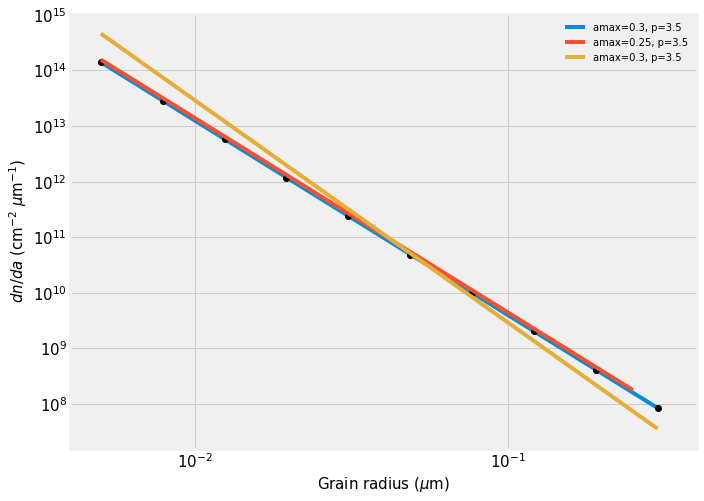

In [7]:
plt.figure( figsize=(10,8) )

plt.plot(MRN77_mod1.a, MRN77_mod1.nd, label='amax=' + str(MRN77_mod1.a[-1]) + ', p=3.5')
plt.plot(MRN77_mod4.a, MRN77_mod4.nd, 'ko', label='')
plt.plot(MRN77_mod2.a, MRN77_mod2.nd, label='amax=' + str(MRN77_mod2.a[-1]) + ', p=3.5')
plt.plot(MRN77_mod3.a, MRN77_mod3.nd, label='amax=' + str(MRN77_mod3.a[-1]) + ', p=3.5')

plt.legend(loc='upper right', frameon=False)
plt.loglog()

plt.tick_params(labelsize=15)
plt.xlabel(r'Grain radius ($\mu$m)', size=15)
plt.ylabel(r'$dn/da$ (cm$^{-2}$ $\mu$m$^{-1}$)', size=15)

plt.xlim(0.004, 0.4)
plt.show()

## 5.2 WD01 model

In [8]:
WD01_MW_gra = sizedist.WD01(graintype='Graphite')
WD01_MW_sil = sizedist.WD01(graintype='Silicate')

WD01_MW_gra_bc6 = sizedist.WD01(graintype='Graphite', bc=6.)
WD01_MW_sil_bc6 = sizedist.WD01(graintype='Silicate', bc=6.)

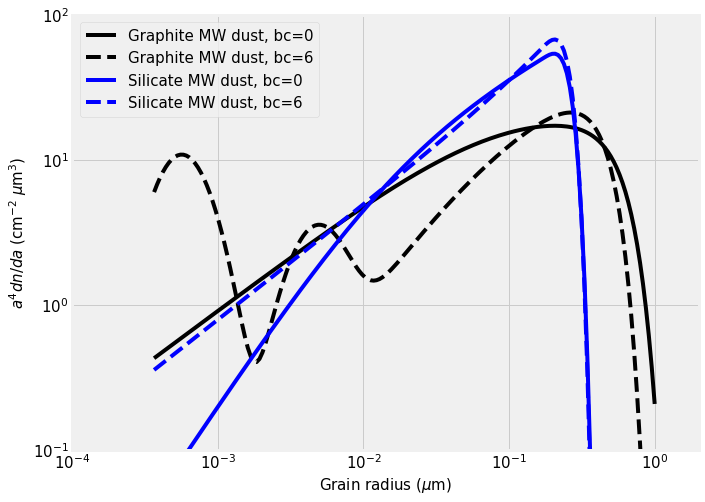

In [9]:
factor = 1.e-12*1.e29
x = WD01_MW_gra.a[28:]

plt.figure( figsize=(10,8) )
plt.plot(x, factor*WD01_MW_gra.nd[28:] * x**4, 'k-', label='Graphite MW dust, bc=0')
plt.plot(x, factor*WD01_MW_gra_bc6.nd[28:] * x**4, 'k--', label='Graphite MW dust, bc=6')

plt.plot(x, factor*WD01_MW_sil.nd[28:] * x**4, 'b-', label='Silicate MW dust, bc=0')
plt.plot(x, factor*WD01_MW_sil_bc6.nd[28:] * x**4, 'b--', label='Silicate MW dust, bc=6')

plt.xlabel(r'Grain radius ($\mu$m)', size=15)
plt.ylabel(r'$a^4 dn/da$ (cm$^{-2}$ $\mu$m$^{3}$)', size=15)
plt.tick_params(labelsize=15)

plt.legend(loc='lower left', frameon=False)
plt.loglog()

plt.xlim(0.0001, 2.)
plt.ylim(0.1, 100.)

plt.legend(loc='upper left', fontsize=15)
plt.show()

# 6. The total mass column of dust (g cm^-2).

<!-- $$\kappa = \frac{1}{M_d}\ \int \sigma\ \frac{dn}{da}\ da $$ -->

In [10]:
print("Graphite dust mass = %.3e" %(WD01_MW_gra.mass_column()))
print("Silicate dust mass = %.3e" %(WD01_MW_sil.mass_column()))

Graphite dust mass = 5.239e-27
Silicate dust mass = 1.398e-26
